In [ ]:
!pip install tf-nightly-gpu-2.0-preview
import tensorflow as tf

  Preparing metadata (setup.py) ... done
  Created wheel for tf-nightly-gpu-2.0-preview: filename=tf_nightly_gpu_2_0_preview-0.0.0.1-py3-none-any.whl size=1543 sha256=eebe3cc47c9153360166e649551a9403dca4095f6a09165a2621870607e4db36
  Stored in directory: /root/.cache/pip/wheels/89/c6/2e/5b35865ca6234c39a564b7803e8105a8050cb66121a475b27c
Successfully built tf-nightly-gpu-2.0-preview


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!unzip /content/sample_data/data_set.zip -d dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: dataset/data_set/train/sad/Training_65267116.jpg  
 extracting: dataset/data_set/train/sad/Training_65275626.jpg  
 extracting: dataset/data_set/train/sad/Training_6529266.jpg  
 extracting: dataset/data_set/train/sad/Training_65329617.jpg  
 extracting: dataset/data_set/train/sad/Training_65338712.jpg  
 extracting: dataset/data_set/train/sad/Training_65338797.jpg  
 extracting: dataset/data_set/train/sad/Training_65387162.jpg  
 extracting: dataset/data_set/train/sad/Training_65404494.jpg  
 extracting: dataset/data_set/train/sad/Training_65426218.jpg  
 extracting: dataset/data_set/train/sad/Training_65430136.jpg  
 extracting: dataset/data_set/train/sad/Training_65437377.jpg  
 extracting: dataset/data_set/train/sad/Training_6545735.jpg  
 extracting: dataset/data_set/train/sad/Training_65463385.jpg  
 extracting: dataset/data_set/train/sad/Training_65473985.jpg  
 extracting: dataset/data_se

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import os


In [ ]:
train_data_dir="/content/dataset/data_set/train"
validation_data_dir="/content/dataset/data_set/test"

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


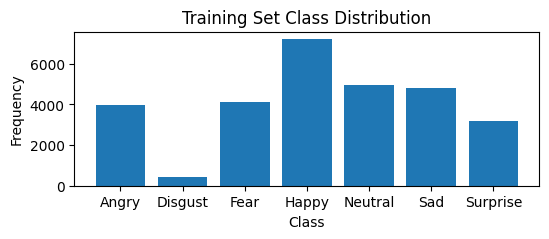

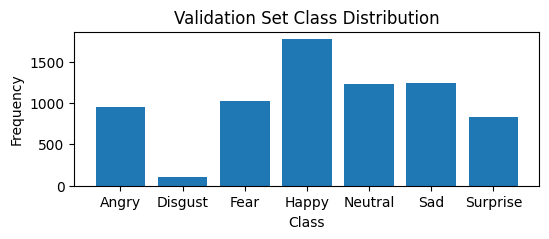

In [ ]:
# Function to plot class distribution
def plot_class_distribution(generator, title):
    class_counts = np.zeros(len(class_labels))

    for i in range(len(generator)):
        _, labels = generator[i]
        class_counts += np.sum(labels, axis=0)

    plt.figure(figsize=(6, 2))
    plt.bar(class_labels, class_counts)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot class distribution for training and validation sets
plot_class_distribution(train_generator, 'Training Set Class Distribution')
plot_class_distribution(validation_generator, 'Validation Set Class Distribution')


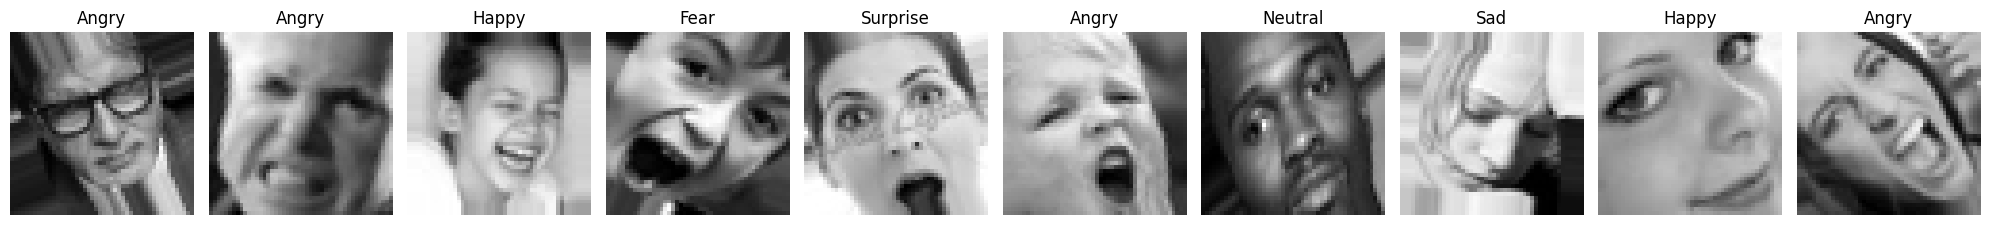

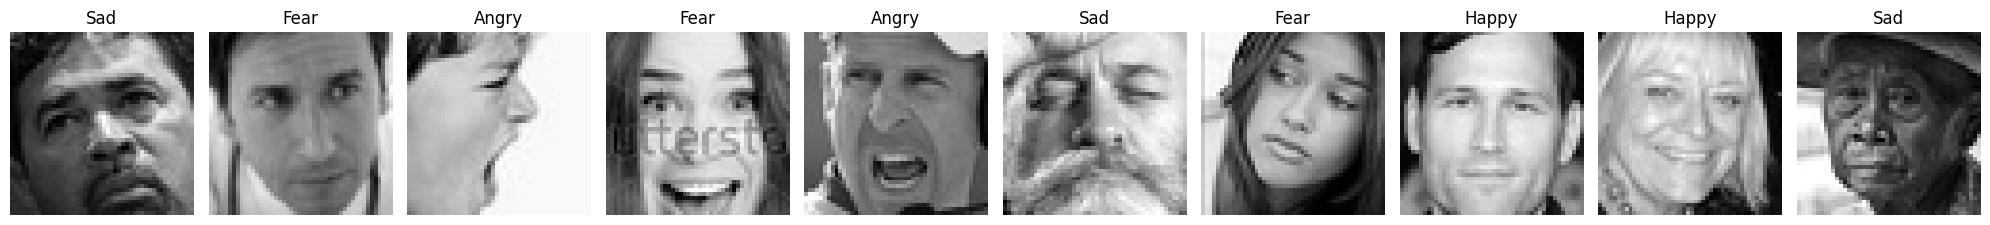

In [ ]:
# Assuming train_generator and validation_generator are already defined
def plot_images(images_arr, labels_arr, class_labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(class_labels[lbl])
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels from the training generator
train_images, train_labels = next(train_generator)
train_images = train_images[:10]  # Get the first 10 images
train_labels = np.argmax(train_labels[:10], axis=1)  # Convert one-hot encoding to class labels

# Plot training images
plot_images(train_images, train_labels, class_labels)

# Get a batch of images and labels from the validation generator
validation_images, validation_labels = next(validation_generator)
validation_images = validation_images[:10]  # Get the first 10 images
validation_labels = np.argmax(validation_labels[:10], axis=1)  # Convert one-hot encoding to class labels

# Plot validation images
plot_images(validation_images, validation_labels, class_labels)

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                

In [ ]:
train_path = "/content/dataset/data_set/train"
test_path = "/content/dataset/data_set/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)
epochs=100

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None,

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# save model structure in jason file
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('emotion_model_collab.weights.h5')
model.save('emotion_model_collab.h5')

1/1 [==============================] - 0s 22ms/step


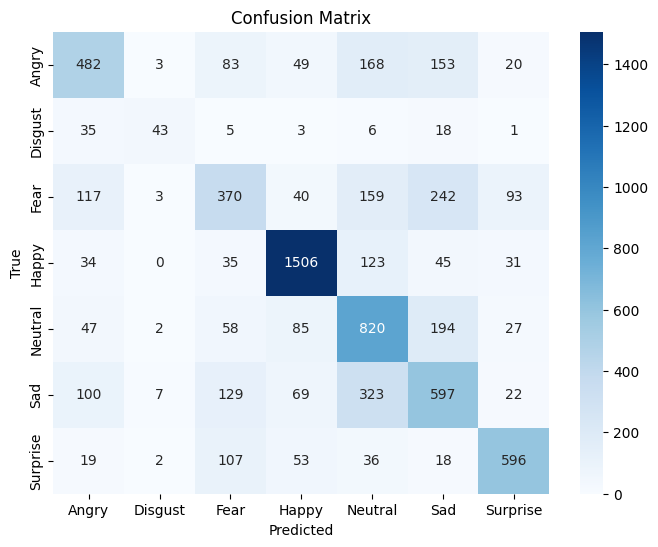

              precision    recall  f1-score   support

       Angry       0.58      0.50      0.54       958
     Disgust       0.72      0.39      0.50       111
        Fear       0.47      0.36      0.41      1024
       Happy       0.83      0.85      0.84      1774
     Neutral       0.50      0.67      0.57      1233
         Sad       0.47      0.48      0.47      1247
    Surprise       0.75      0.72      0.74       831

    accuracy                           0.61      7178
   macro avg       0.62      0.57      0.58      7178
weighted avg       0.62      0.61      0.61      7178



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predicted labels for the validation set
true_labels = []
predicted_labels = []

# Reset the validation generator and loop over it to get all the data
validation_generator.reset()
for i in range(len(validation_generator)):
    x, y = validation_generator[i]
    true_labels.extend(np.argmax(y, axis=1))
    predictions = model.predict(x)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

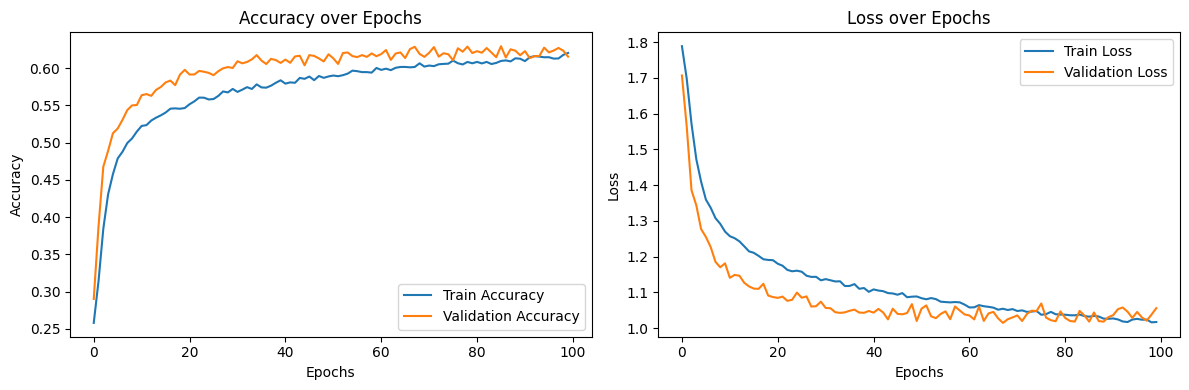

In [ ]:
import matplotlib.pyplot as plt
# Plotting the metrics
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.tight_layout()
plt.show()